In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

import pandas as pd
from scipy.sparse import csr_matrix

In [82]:
ls

Kiva_EDA.ipynb                       ll_ones.csv
Kiva_Matrix.ipynb                    llt.csv
LenderPersonas2015Posters_FINAL.pdf  loans_feat_mtrx.mtx
LightFM.ipynb                        loans_sample500.csv
Pandas_ALS_CSR.ipynb                 main.py
README.md                            private/
References/                          processed_data/
Spark_local_ALS_samples.ipynb        scripts/
kiva_ds_csv/                         spark-warehouse/
kiva_spark_aws.ipynb                 user_feat_mtrx.mtx
lenders_sample500.csv                vocs.json


In [75]:
lenders = pd.read_csv('kiva_ds_csv/lenders.csv')

In [83]:
loans = pd.read_csv('kiva_ds_csv/loans.csv', parse_dates=['POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME','RAISED_TIME'])

In [24]:
# lenders.head()
lenders['MEMBER_SINCE'] = pd.to_datetime(lenders.MEMBER_SINCE, unit='s')

In [84]:
ll = pd.read_csv('ll_ones.csv')

In [85]:
ll.head()

,LOAN_ID,lender_v,value
0,483693,970524,1
1,483693,1153379,1
2,483693,187221,1
3,483693,758772,1
4,483693,1090160,1


In [86]:
lenders.head()

,PERMANENT_NAME,DISPLAY_NAME,MAIN_PIC_ID,CITY,STATE,COUNTRY_CODE,MEMBER_SINCE,PERSONAL_URL,OCCUPATION,LOAN_BECAUSE,OTHER_INFO,LOAN_PURCHASE_NUM,INVITED_BY,NUM_INVITED
0,qian3013,Qian,NaN,NaN,NaN,NaN,1461300457,NaN,NaN,NaN,NaN,1.0,NaN,0
1,reena6733,Reena,NaN,NaN,NaN,NaN,1461300634,NaN,NaN,NaN,NaN,9.0,NaN,0
2,mai5982,Mai,NaN,NaN,NaN,NaN,1461300853,NaN,NaN,NaN,NaN,NaN,NaN,0
3,andrew86079135,Andrew,NaN,NaN,NaN,NaN,1461301091,NaN,NaN,NaN,NaN,5.0,Peter Tan,0
4,nguyen6962,Nguyen,NaN,NaN,NaN,NaN,1461301154,NaN,NaN,NaN,NaN,NaN,NaN,0


In [87]:
ulist = lenders[["LOAN_PURCHASE_NUM"] + ['NUM_INVITED']]

In [88]:
loans = loans[['FUNDED_AMOUNT','NUM_LENDERS_TOTAL','LENDER_TERM']]

In [89]:
from sklearn.feature_extraction import DictVectorizer
import scipy.io as spi

In [90]:
def make_feature_matrix(df,user_or_item):
    df = df.T.to_dict().values()
    vec = DictVectorizer(sparse=True)
    ulist = vec.fit_transform(df)
    ulist = csr_matrix(ulist, dtype=np.int32)
    # Save the matrix. They are already in csr format
    spi.mmwrite("{}_feat_mtrx.mtx".format(user_or_item),ulist)

In [91]:
make_feature_matrix(ulist,'lenders')

In [94]:
make_feature_matrix(loans,'loans')

In [69]:
ls

Kiva_EDA.ipynb                       ll_ones.csv
Kiva_Matrix.ipynb                    llt.csv
LenderPersonas2015Posters_FINAL.pdf  loans_feat_mtrx.mtx
LightFM.ipynb                        loans_sample500.csv
Pandas_ALS_CSR.ipynb                 main.py
README.md                            private/
References/                          processed_data/
Spark_local_ALS_samples.ipynb        scripts/
kiva_ds_csv/                         spark-warehouse/
kiva_spark_aws.ipynb                 user_feat_mtrx.mtx
lenders_sample500.csv                vocs.json


In [92]:
user_features = spi.mmread('lenders_feat_mtrx.mtx')

In [93]:
user_features

<2349174x2 sparse matrix of type '<class 'numpy.int64'>'
	with 2480002 stored elements in COOrdinate format>

In [95]:
loans_features = spi.mmread('loans_feat_mtrx.mtx')

In [96]:
loans_features

<1419607x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4253685 stored elements in COOrdinate format>

In [97]:
df_array = ll.values

In [98]:
df_array

array([[ 483693,  970524,       1],
       [ 483693, 1153379,       1],
       [ 483693,  187221,       1],
       ...,
       [1206425,  349499,       1],
       [1206486,   20843,       1],
       [1206486,   57259,       1]])

In [99]:
from scipy.sparse import csr_matrix

df_sparse = csr_matrix( (df_array[:,2], (df_array[:,0], df_array[:,1])), shape=(1450000,1387432))

In [100]:
df_sparse

<1450000x1387432 sparse matrix of type '<class 'numpy.int64'>'
	with 27459086 stored elements in Compressed Sparse Row format>

In [102]:
from lightfm import LightFM

In [103]:
model = LightFM(loss='warp')

In [104]:
model.fit_partial(df_sparse,user_features=user_features,item_features=loans_features,verbose=True)

Epoch 0


In [105]:
model.predict()

TypeError: predict() missing 1 required positional argument: 'item_ids'

## Lenders profiles EDA

In [113]:
def find_percent(df,cols):
    mp = []
    for col in cols:
        percent = (df[col].isnull().sum()/df[col].isnull().count()*100).round(2)
        mp.append(percent)
    return mp

#plot each column histgram
def plot_columns(df, col_list,ncols,nrows,figsize):
    fig,axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=figsize);
    axs = axes.ravel()
    for c,a,p in zip(col_list,axs,find_percent(df,col_list)):
        df[c].hist(ax=a);
        a.set_title("{} distribution ({}% missing values)".format(c,p),fontsize=10)



In [110]:
lenders.head()

,PERMANENT_NAME,DISPLAY_NAME,MAIN_PIC_ID,CITY,STATE,COUNTRY_CODE,MEMBER_SINCE,PERSONAL_URL,OCCUPATION,LOAN_BECAUSE,OTHER_INFO,LOAN_PURCHASE_NUM,INVITED_BY,NUM_INVITED
0,qian3013,Qian,NaN,NaN,NaN,NaN,1461300457,NaN,NaN,NaN,NaN,1.0,NaN,0
1,reena6733,Reena,NaN,NaN,NaN,NaN,1461300634,NaN,NaN,NaN,NaN,9.0,NaN,0
2,mai5982,Mai,NaN,NaN,NaN,NaN,1461300853,NaN,NaN,NaN,NaN,NaN,NaN,0
3,andrew86079135,Andrew,NaN,NaN,NaN,NaN,1461301091,NaN,NaN,NaN,NaN,5.0,Peter Tan,0
4,nguyen6962,Nguyen,NaN,NaN,NaN,NaN,1461301154,NaN,NaN,NaN,NaN,NaN,NaN,0


In [137]:
lenders['OCCUPATION'].value_counts()[-70000:]

owner finance company                                1
server / script writer                               1
best garage door repair company ca                   1
flavorist                                            1
travel guru                                          1
stressconsultant                                     1
tribal governance intern - marketing professional    1
loved puppy                                          1
desemployed                                          1
international transport                              1
paralegal consultant                                 1
new york, usa                                        1
supervillian                                         1
shish grill                                          1
co, director                                         1
marketing + design                                   1
realtor/sales associate                              1
general contractor/habitat for humanity              1
hotel lice

In [118]:
lenders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349174 entries, 0 to 2349173
Data columns (total 14 columns):
PERMANENT_NAME       object
DISPLAY_NAME         object
MAIN_PIC_ID          float64
CITY                 object
STATE                object
COUNTRY_CODE         object
MEMBER_SINCE         int64
PERSONAL_URL         object
OCCUPATION           object
LOAN_BECAUSE         object
OTHER_INFO           object
LOAN_PURCHASE_NUM    float64
INVITED_BY           object
NUM_INVITED          int64
dtypes: float64(2), int64(2), object(10)
memory usage: 250.9+ MB


In [121]:
lenders['OCCUPATION'] = lenders['OCCUPATION'].fillna('NA')
lenders['OCCUPATION'] = lenders['OCCUPATION'].apply(lambda x: x.lower())

In [127]:
lenders['OCCUPATION'][lenders['OCCUPATION'].apply(lambda x: "attorney" in x)] = "lawyer"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
lenders['OCCUPATION'][lenders['OCCUPATION'].apply(lambda x: "student" in x)] = "student"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
lenders['OCCUPATION'][lenders['OCCUPATION'].apply(lambda x: "engineer" in x or "software developer" in x)] = "engineer"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
lenders['OCCUPATION'][lenders['OCCUPATION'].apply(lambda x: "teacher" in x or "professor" in x)] = "teacher"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
lenders['OCCUPATION'][lenders['OCCUPATION'].apply(lambda x: "retired" in x)] = "retired"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
# lenders.columns
col_list = ['CITY', 'STATE',
       'COUNTRY_CODE', 'MEMBER_SINCE', 'OCCUPATION',
'LOAN_PURCHASE_NUM', 
       'NUM_INVITED']

KeyboardInterrupt: 

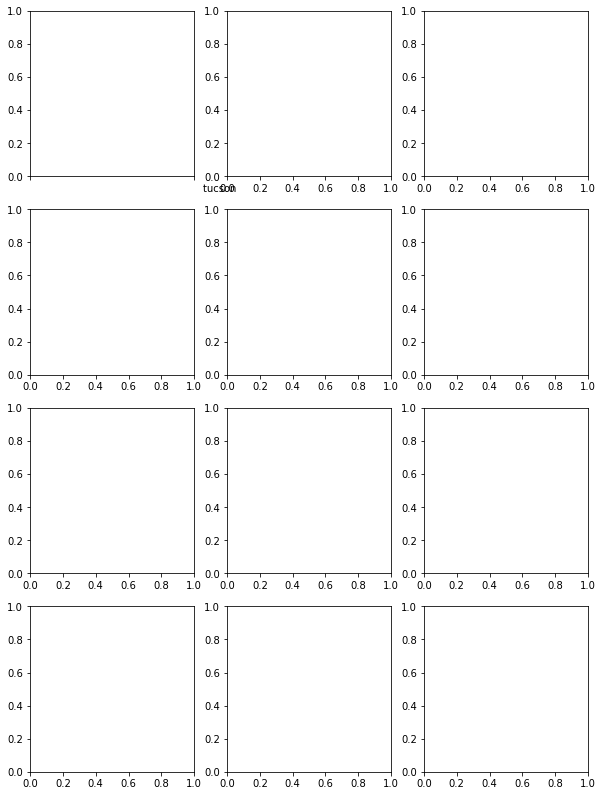

In [114]:
plot_columns(lenders,col_list,3,4,(10,14))